**Al Bundy Inventory Management**

##INTRODUCTION

Al Bundy is a US based company that has been established 30 years ago Currently, it also operates in Canada, the UK and Germany. The firm sells mid to high end shoes ranging from one hundred and twenty to two hundred dollars.

While the shoes are of high quality, you have lots and lots of inventory that is never sold. In other words, the shoes collect dust on store shelves Inventory management is a very common problem, many, if not most, shops cannot determine the right number of items they need to keep in stock.

The opposite problem arises to shops don't supply an adequate amount of goods and fail to meet the demand in their market. For instance, you have surely entered a shoe shop, but we're unable to buy a specific pair of shoes because they did not have them in stock in this example. We will examine the opposite problem, having too much inventory.

This is a more significant problem for the company as it means the company has invested in producing or purchasing the product but was not able to sell it.

#IMPORTING DATASET

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math

In [64]:
dataset = pd.read_csv('Al_Bundy.csv')
dataset = dataset.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=0)
dataset

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14964,65775,2016-12-31 15:59:12,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


From the table, we can see columns of InvoiceNo, Date, Country, ProductID, Shop, Gender, Size(US), Size (Europe), Size (UK), UnitPrice, Discount, Year, Month, SalePrice.

In the dataset, some columns can be hiden with consideration that the columns can be represented by other column.
For example, Size (US) can represent Size (UK), Size (Europe). Year and Month can represent the Date for this case, we don't really need specific time. Month and Year are enough.

We can hide InvoiceNo, ProductID, Shop since they are just unique labels. We can count them by counting the gender then.

UnitPrice, Discount, and SalePrice are informative attributes for other purposes. But in this case, we won't consider the price, just the number of pair that will be recommended for the next year production.

#Exploratory Data

We have to be on the same frame that:
1. This dataset is sample data, since we can see that given only three years of data.
2. We have to determine which attributes that will be its big subgroups category. In this case, the attribute 'Gender' is will be the best one. So there are Male and Female.
3. We will make the segment of the dataset by Shoe size, Country, Gender.

So, we have to divide the data based on Gender.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


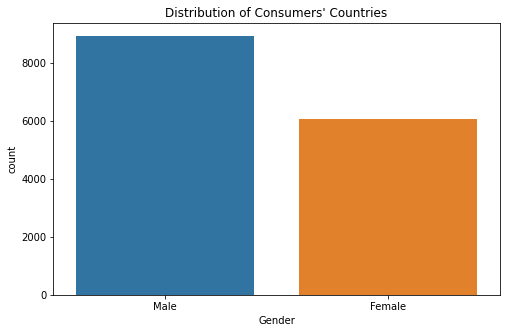

In [65]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Consumers\' Countries')
sns.countplot(dataset['Gender'])

The bar plot above simply tell us that the Male transactions is more than the Female transactions. First hypothesis from this data is that the Male Shoes Productions will prioritized since we know that the transactions is more than the Female's. Sure, *the probability of the transactions happen* is bigger as well.

In [66]:
Male = dataset[dataset['Gender'] == 'Male']
Female = dataset[dataset['Gender'] == 'Female']

In [67]:
Male

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
5,52394,2014-01-01 15:59:12,United States,2173,US15,Male,10.5,43-44,10.0,159,0.0,2014,1,159.0
7,52396,2014-01-02 09:01:36,Canada,2238,CAN5,Male,10.0,43,9.5,169,0.0,2014,1,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,65769,2016-12-31 04:42:24,Germany,2210,GER2,Male,10.5,43-44,10.0,179,0.5,2016,12,89.5
14960,65771,2016-12-31 07:49:36,United States,2209,US15,Male,9.0,42,8.5,189,0.0,2016,12,189.0
14961,65772,2016-12-31 09:59:12,United States,2168,US13,Male,8.0,41,7.5,129,0.0,2016,12,129.0
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0


In [68]:
Female

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0
6,52395,2014-01-02 01:06:24,Germany,2200,GER2,Female,9.0,39-40,7.0,179,0.0,2014,1,179.0
9,52398,2014-01-02 13:35:12,United Kingdom,2237,UK1,Female,9.0,39-40,7.0,149,0.0,2014,1,149.0
11,52399,2014-01-02 14:18:24,United States,2213,US11,Female,9.5,40,7.5,169,0.1,2014,1,152.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,65768,2016-12-31 04:42:24,Germany,2205,GER1,Female,7.5,38,5.5,159,0.0,2016,12,159.0
14959,65770,2016-12-31 04:56:48,United States,2178,US13,Female,8.0,38-39,6.0,149,0.2,2016,12,119.2
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


The main problem of this project is "What is the number of shoes that are likely to be sold in the next year (in this case, to be suggested for 2017 production), based on historcal data?"

From the table, we know that this data contains '2014 until 2016' transactions data. To decide which part of data that we will proceed, I got two options here based on the reason.
1. First, if we consider the data quantity, certainly I will use all of the '2014 until 2016' data. The conclusion of this data in the end, can be used to decide the productions for triennial (produce once for 3 years demands).
2. Second, if we consider about the relevance with the latest trend, vibes, and somethings like that, I'm coming with the '2016' data instead of take all of them. The conclusion will be more relevan for one year production.

In the end of this project, I'll show the difference results between 'All' data and '2016 only' data. Lets take a look.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


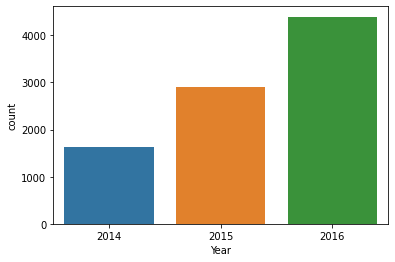

In [69]:
sns.countplot(Male['Year'])

From the graph above, the number of transactions in 2016 is the largest one. Of course, this will give us a little bit of convenience. Since the 2016 data is the largest one, it could represent all of the data and it will leads us to relatively choose the second options (Use the 2016 data only for 2017 production). 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


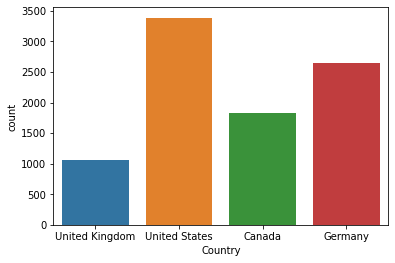

In [70]:
sns.countplot(Male['Country'])

From the graph above, we can see that the transactions were happening mostly in United States, and also in Germany followed behind. But our purpose is to suggest the productions for each country, so all of the Country data will be included. 

#Data of 2014 - 2016

Let's start with data of 2014-2016. We will see the distribution graphs of frequency from each Country. 
We will count them in Size (US), since we know that we just need to choose one of the size type, then we can convert them to the others. So we choose Size (US) randomly.

In [71]:
a = Male['Month'].unique()
a = np.array(pd.DataFrame(a).sort_values([0] ,ascending=True))
b = Male['Size (US)'].unique()
b = np.array(pd.DataFrame(b).sort_values([0] ,ascending=True))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Germany')

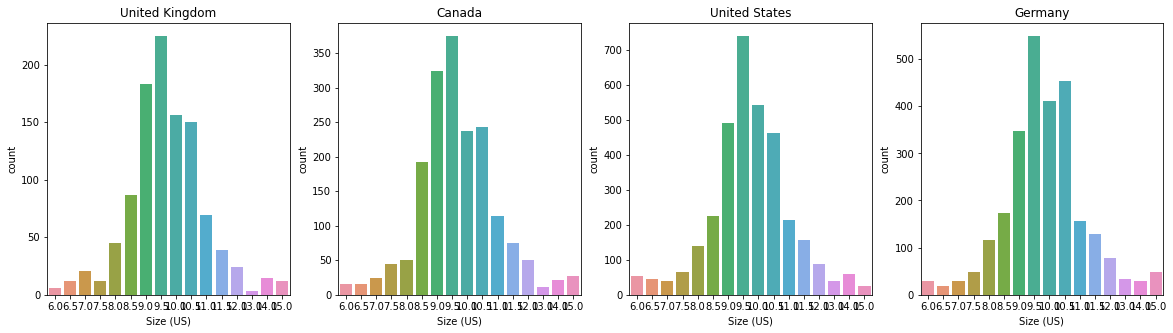

In [72]:
Male_Size_UK = Male[Male['Country'] == 'United Kingdom']['Size (US)']
Male_Size_Canada = Male[Male['Country'] == 'Canada']['Size (US)']
Male_Size_US = Male[Male['Country'] == 'United States']['Size (US)']
Male_Size_Germany = Male[Male['Country'] == 'Germany']['Size (US)']

#Frequency Distribution Graphs
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
sns.countplot(Male_Size_UK)
plt.title('United Kingdom')

fig.add_subplot(1,4,2)
sns.countplot(Male_Size_Canada)
plt.title('Canada')

fig.add_subplot(1,4,3)
sns.countplot(Male_Size_US)
plt.title('United States')

fig.add_subplot(1,4,4)
sns.countplot(Male_Size_Germany)
plt.title('Germany')

From the graphs above, at a glance we can see that the form of the distributions looklike normal distribution, since we can see the dominant frequency in the middle and also they have two tails in the low and high interval of shoes size (US).

Even if we cannot see the exact shape of normal distribution, but we surely will see the normal distribution in the distribution of 'sample mean interval', based on **Central Limit Theorm**. Remember that in this theorm, we assume that whatever the form of the population distribution, the sampling distribution of the mean will resemble normal distribution.

Before we proceed them furthermore, I'll show you some of mathematics formulas that will be used to help us get the aim of this project. The formulas consist of:
1. standard deviation,
2. standard error,
3. margin of error, and
4. confidence interval.



In [73]:
#The Formulas
from IPython.display import display, Math, Latex
print('Standard deviation for Population')
display(Math(r'\sigma = \sqrt{\frac{\Sigma{(x_i - \mu)^2}}{N}}'))
print('\nStandard deviation for Sample')
display(Math(r's = \sqrt{\frac{\Sigma{(x_i - \mu)^2}}{n-1}}'))
print('\nStandard Error')
display(Math(r'Standard Error = \frac{s}{\sqrt{n}}'))

print('\nMargin of Error')
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))

print('\nConfindence Interval (CI)')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))

print('\nConfindence Interval (CI), Confidence = 95%')
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

Standard deviation for Population


<IPython.core.display.Math object>


Standard deviation for Sample


<IPython.core.display.Math object>


Standard Error


<IPython.core.display.Math object>


Margin of Error


<IPython.core.display.Math object>


Confindence Interval (CI)


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, let's take a look to Female's shoes size distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Germany')

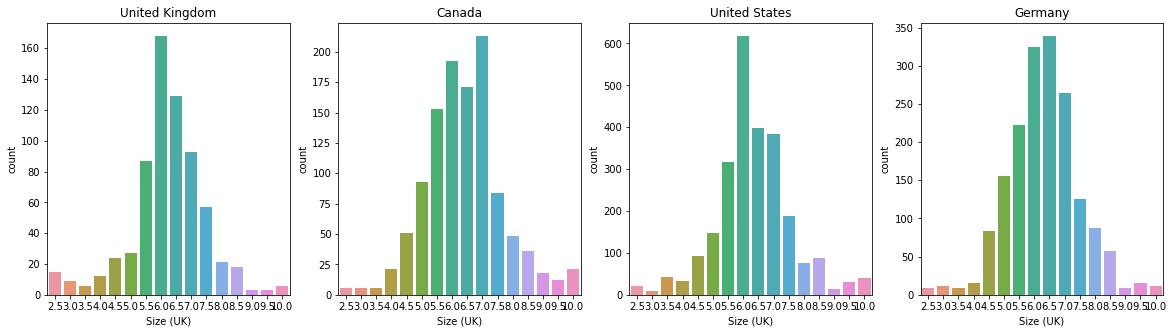

In [74]:
Female_Size_UK = Female[Female['Country'] == 'United Kingdom']['Size (UK)']
Female_Size_Canada = Female[Female['Country'] == 'Canada']['Size (UK)']
Female_Size_US = Female[Female['Country'] == 'United States']['Size (UK)']
Female_Size_Germany = Female[Female['Country'] == 'Germany']['Size (UK)']

#Frequency Distribution Graphs of 
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
sns.countplot(Female_Size_UK)
plt.title('United Kingdom')

fig.add_subplot(1,4,2)
sns.countplot(Female_Size_Canada)
plt.title('Canada')

fig.add_subplot(1,4,3)
sns.countplot(Female_Size_US)
plt.title('United States')

fig.add_subplot(1,4,4)
sns.countplot(Female_Size_Germany)
plt.title('Germany')

They look similar with the distribution of the Male's shoes size, but we get different upper and lower limit of the size.

We will import t-stat value for certain $degree of freedom$ and $alpha$. Since we know that $degree of freedom$ is equals number of data points (n) - 1, and we have 12 months as the number of data points (n), so we will got the $degree of freedom$ = 12 - 1 = 11.

We want to obtain the number of pair shoes for each country, by using Confidence Interval with 95% of Confidence.
Then, we also set the Confidence 0.95, so the $alpha$ will be (1 - Confidence) = (1 - 0.95 = 0.5). Then we will got $alpha$ =(0.5).

But, we have to know that, to select the t-stat value, the form will be t_(n-1, $alpha$/2). So that we will get the form of t_(11, 0.025)

We will see the t stat table here.

In [75]:
#t Table
op = pd.read_excel('t_table.xlsx')
op = op.drop(columns=['Unnamed: 0'], axis=1)
op2 = op.drop([0,1,2,3,4], axis=0)
op2 = pd.DataFrame(np.array(op2))
op2.columns = op.iloc[4]
op2 = op2.set_index('d.f. / α')
op2

4,0.100,0.050,0.025,0.010,0.005
d.f. / α,,,,,
1,3.078,6.314,12.706,31.821,63.657
2,1.886,2.92,4.303,6.965,9.925
3,1.638,2.353,3.182,4.541,5.841
4,1.533,2.132,2.776,3.747,4.604
5,1.476,2.015,2.571,3.365,4.032
6,1.44,1.943,2.447,3.143,3.707
7,1.415,1.895,2.365,2.998,3.499
8,1.397,1.86,2.306,2.896,3.355
9,1.383,1.833,2.262,2.821,3.25


From the the table, we can see that the t-stat value that we find is right at index 11, column 0.025. Then we will define a constant variable named 't11_0.025' as the constant t-stat value for the further process.

In [76]:
#defining the value of the t-stat for CI = 95% and 12 data points (12 months) 
t11_0025 = op2.loc[11][0.025]  
print('t11_0.025 = ', t11_0025)

t11_0.025 =  2.201


##Frequency Distribution Tables

From the dataset, we will show the distribution of 'pair of shoes' for each country, the data from Male's shoes and Female's as well.


In [77]:
tbl_male1 = Male.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Month'], axis = 1)
tbl_male2 = pd.pivot_table(tbl_male1, values='Gender', index=['Size (US)'], columns='Country', aggfunc='count')
print('Male Size Table')
tbl_male2

Male Size Table


Country,Canada,Germany,United Kingdom,United States
Size (US),,,,
6.0,15,30,6,54
6.5,15,18,12,45
7.0,24,30,21,39
7.5,45,48,12,66
8.0,51,117,45,141
8.5,192,174,87,225
9.0,324,348,183,492
9.5,375,549,225,741
10.0,237,411,156,543


In [78]:
tbl_female1 = Female.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Month'], axis = 1)
tbl_female2 = pd.pivot_table(tbl_female1, values='Gender', index=['Size (US)'], columns='Country', aggfunc='count')
print('Female Size Table')
tbl_female2

Female Size Table


Country,Canada,Germany,United Kingdom,United States
Size (US),,,,
4.5,6,9,15,21
5.0,6,12,9,9
5.5,6,9,6,42
6.0,21,15,12,33
6.5,51,84,24,93
7.0,93,156,27,147
7.5,153,222,87,318
8.0,192,324,168,618
8.5,171,339,129,399


We can see that the Size for Male and Female have different interval. The male size has 6 upto 15, while the female size has 4.5 upto 12.0.

Now, let's focus on Male Size for each country from 2014-2016 data.

###$Male Monthly$

####Male_Canada

This table contains distribution of shoes size for each month in Canada.

In [79]:
male_Canada = Male[Male['Country'] == 'Canada']
tbl_male_Canada = male_Canada.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_Canada = pd.pivot_table(tbl_male_Canada, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in Canada)')
tbl_male_Canada

Male Size Table (Monthly in Canada)


Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,5.0,3.0,1.0
6.5,0.0,0.0,4.0,4.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
7.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,3.0,4.0,1.0,7.0
7.5,6.0,3.0,0.0,0.0,6.0,0.0,6.0,2.0,5.0,6.0,4.0,7.0
8.0,4.0,10.0,8.0,8.0,1.0,2.0,11.0,2.0,3.0,1.0,0.0,1.0
8.5,9.0,11.0,14.0,16.0,12.0,14.0,9.0,38.0,18.0,27.0,11.0,13.0
9.0,20.0,22.0,27.0,45.0,25.0,32.0,26.0,30.0,22.0,38.0,8.0,29.0
9.5,15.0,20.0,20.0,49.0,30.0,40.0,36.0,44.0,26.0,32.0,24.0,39.0
10.0,22.0,18.0,16.0,18.0,21.0,21.0,13.0,21.0,19.0,27.0,20.0,21.0


By using the mathematics formulas that we have met before, we will determine the mean value, standard error, margin of error, and the confidence interval.

By the way, we will get the recommendation of 'number of pair' for each size by using the upper limit from the Confidence Interval. We will round the number to **the nearest integer**.

In [80]:
m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_Canada['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Canada = []
for i in arr:
  mean_Canada.append(sum(np.squeeze(tbl_male_Canada.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Canada = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_Canada.loc[[i],m])))/ math.sqrt(n_Canada))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_Canada.loc[[i],m])))/ math.sqrt(n_Canada))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Canada[i] - ME[i])
  CI_max.append(mean_Canada[i] + ME[i])

#Number of Pairs
num_pair_m_Canada = []
for i in range(0, len(CI_max)):
  num_pair_m_Canada.append(round(CI_max[i], 0))
num_pair_m_Canada

print('Table of Suggestion Number of Pair of Shoes for Canada')
tblmale_Canada = pd.DataFrame(np.squeeze(np.array(tbl_male_Canada)))
final_Canada = pd.concat([tblmale_Canada, 
               pd.DataFrame(mean_Canada), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_Canada),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Canada = final_Canada.set_index('Size (US)')
final_Canada

Table of Suggestion Number of Pair of Shoes for Canada


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,5.0,3.0,1.0,0.9375,0.428617,0.943385,-0.005885,1.880885,2.0
6.5,0.0,0.0,4.0,4.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.9375,0.494286,1.087922,-0.150422,2.025422,2.0
7.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,3.0,4.0,1.0,7.0,1.5000,0.564076,1.241531,0.258469,2.741531,3.0
7.5,6.0,3.0,0.0,0.0,6.0,0.0,6.0,2.0,5.0,6.0,4.0,7.0,2.8125,0.769937,1.694631,1.117869,4.507131,5.0
8.0,4.0,10.0,8.0,8.0,1.0,2.0,11.0,2.0,3.0,1.0,0.0,1.0,3.1875,1.128991,2.484910,0.702590,5.672410,6.0
8.5,9.0,11.0,14.0,16.0,12.0,14.0,9.0,38.0,18.0,27.0,11.0,13.0,12.0000,2.446395,5.384515,6.615485,17.384515,17.0
9.0,20.0,22.0,27.0,45.0,25.0,32.0,26.0,30.0,22.0,38.0,8.0,29.0,20.2500,2.679891,5.898441,14.351559,26.148441,26.0
9.5,15.0,20.0,20.0,49.0,30.0,40.0,36.0,44.0,26.0,32.0,24.0,39.0,23.4375,3.060315,6.735754,16.701746,30.173254,30.0
10.0,22.0,18.0,16.0,18.0,21.0,21.0,13.0,21.0,19.0,27.0,20.0,21.0,14.8125,0.993349,2.186361,12.626139,16.998861,17.0


In the last column, we can see the suggestion number of pair for Male shoes in Canada. That the exact number of pair shoes that we need to present. But, we will see the difference with the '2016' data in the end.
Then, we will do the same thing, to the data of Male Shoes Size in Germany, United Kingdom, and also in United States.

####Male_Germany

In [81]:
male_Germany = Male[Male['Country'] == 'Germany']
tbl_male_Germany = male_Germany.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_Germany = pd.pivot_table(tbl_male_Germany, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in Germany)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_Germany['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Germany = []
for i in arr:
  mean_Germany.append(sum(np.squeeze(tbl_male_Germany.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Germany = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_Germany.loc[[i],m])))/ math.sqrt(n_Germany))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_Germany.loc[[i],m])))/ math.sqrt(n_Germany))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Germany[i] - ME[i])
  CI_max.append(mean_Germany[i] + ME[i])

#Number of Pairs
num_pair_m_Germany = []
for i in range(0, len(CI_max)):
  num_pair_m_Germany.append(round(CI_max[i], 0))
num_pair_m_Germany

print('Table of Suggestion Number of Pair of Shoes for Germany')
tblmale_Germany = pd.DataFrame(np.squeeze(np.array(tbl_male_Germany)))
final_Germany = pd.concat([tblmale_Germany, 
               pd.DataFrame(mean_Germany), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_Germany),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Germany = final_Germany.set_index('Size (US)')
final_Germany

Male Size Table (Monthly in Germany)
Table of Suggestion Number of Pair of Shoes for Germany


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,4.0,2.0,0.0,0.0,1.0,2.0,0.0,6.0,2.0,10.0,2.0,1.0,1.8750,0.848350,1.867217,0.007783,3.742217,4.0
6.5,2.0,2.0,1.0,1.0,0.0,3.0,5.0,1.0,2.0,1.0,0.0,0.0,1.1250,0.417424,0.918749,0.206251,2.043749,2.0
7.0,0.0,0.0,3.0,2.0,0.0,5.0,3.0,6.0,6.0,2.0,3.0,0.0,1.8750,0.657129,1.446340,0.428660,3.321340,3.0
7.5,4.0,3.0,1.0,1.0,5.0,11.0,3.0,2.0,6.0,6.0,3.0,3.0,3.0000,0.797724,1.755791,1.244209,4.755791,5.0
8.0,10.0,8.0,13.0,11.0,3.0,8.0,8.0,12.0,14.0,12.0,9.0,9.0,7.3125,0.853913,1.879462,5.433038,9.191962,9.0
8.5,18.0,12.0,16.0,20.0,10.0,21.0,19.0,7.0,16.0,16.0,14.0,5.0,10.8750,1.469385,3.234115,7.640885,14.109115,14.0
9.0,26.0,11.0,14.0,21.0,26.0,45.0,50.0,21.0,51.0,29.0,17.0,37.0,21.7500,3.973396,8.745445,13.004555,30.495445,30.0
9.5,56.0,38.0,24.0,29.0,44.0,54.0,49.0,41.0,43.0,55.0,43.0,73.0,34.3125,3.760087,8.275952,26.036548,42.588452,43.0
10.0,30.0,29.0,25.0,41.0,30.0,40.0,49.0,31.0,33.0,34.0,39.0,30.0,25.6875,1.942838,4.276187,21.411313,29.963687,30.0


####Male_UK

In [82]:
male_UK = Male[Male['Country'] == 'United Kingdom']
tbl_male_UK = male_UK.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_UK = pd.pivot_table(tbl_male_UK, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in United Kingdom)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_UK['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_UK = []
for i in arr:
  mean_UK.append(sum(np.squeeze(tbl_male_UK.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_UK = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_UK.loc[[i],m])))/ math.sqrt(n_UK))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_UK.loc[[i],m])))/ math.sqrt(n_UK))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_UK[i] - ME[i])
  CI_max.append(mean_UK[i] + ME[i])

#Number of Pairs
num_pair_m_UK = []
for i in range(0, len(CI_max)):
  num_pair_m_UK.append(round(CI_max[i], 0))
num_pair_m_UK

print('Table of Suggestion Number of Pair of Shoes for United Kingdom')
tblmale_UK = pd.DataFrame(np.squeeze(np.array(tbl_male_UK)))
final_UK = pd.concat([tblmale_UK, 
               pd.DataFrame(mean_UK), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_UK),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_UK = final_UK.set_index('Size (US)')
final_UK

Male Size Table (Monthly in United Kingdom)
Table of Suggestion Number of Pair of Shoes for United Kingdom


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.3750,0.230283,0.506853,-0.131853,0.881853,1.0
6.5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,1.0,0.0,0.7500,0.460566,1.013706,-0.263706,1.763706,2.0
7.0,3.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,3.0,2.0,2.0,0.0,1.3125,0.478714,1.053649,0.258851,2.366149,2.0
7.5,0.0,2.0,0.0,0.0,3.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,0.7500,0.408248,0.898554,-0.148554,1.648554,2.0
8.0,2.0,0.0,2.0,1.0,5.0,6.0,9.0,0.0,2.0,6.0,6.0,6.0,2.8125,0.844994,1.859832,0.952668,4.672332,5.0
8.5,5.0,9.0,10.0,6.0,7.0,4.0,11.0,12.0,7.0,4.0,3.0,9.0,5.4375,0.853913,1.879462,3.558038,7.316962,7.0
9.0,19.0,5.0,17.0,15.0,7.0,27.0,11.0,18.0,27.0,15.0,13.0,9.0,11.4375,2.015564,4.436257,7.001243,15.873757,16.0
9.5,18.0,10.0,21.0,26.0,21.0,25.0,9.0,21.0,21.0,27.0,11.0,15.0,14.0625,1.796988,3.955171,10.107329,18.017671,18.0
10.0,11.0,9.0,11.0,11.0,12.0,11.0,12.0,30.0,12.0,9.0,17.0,11.0,9.7500,1.651446,3.634832,6.115168,13.384832,13.0


####Male_US

In [83]:
male_US = Male[Male['Country'] == 'United States']
tbl_male_US = male_US.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_US = pd.pivot_table(tbl_male_US, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in United States)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_US['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_US = []
for i in arr:
  mean_US.append(sum(np.squeeze(tbl_male_US.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_US = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_US.loc[[i],m])))/ math.sqrt(n_US))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_US.loc[[i],m])))/ math.sqrt(n_US))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_US[i] - ME[i])
  CI_max.append(mean_US[i] + ME[i])

#Number of Pairs
num_pair_m_US = []
for i in range(0, len(CI_max)):
  num_pair_m_US.append(round(CI_max[i], 0))
num_pair_m_US

print('Table of Suggestion Number of Pair of Shoes for United States')
tblmale_US = pd.DataFrame(np.squeeze(np.array(tbl_male_US)))
final_US = pd.concat([tblmale_US, 
               pd.DataFrame(mean_US), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_US),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_US = final_US.set_index('Size (US)')
final_US

Male Size Table (Monthly in United States)
Table of Suggestion Number of Pair of Shoes for United States


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,4.0,3.0,3.0,1.0,6.0,4.0,4.0,7.0,8.0,11.0,3.0,0.0,3.3750,0.883348,1.944248,1.430752,5.319248,5.0
6.5,7.0,3.0,0.0,4.0,0.0,0.0,3.0,10.0,5.0,2.0,5.0,6.0,2.8125,0.888692,1.956010,0.856490,4.768510,5.0
7.0,0.0,1.0,2.0,0.0,9.0,6.0,5.0,2.0,4.0,4.0,3.0,3.0,2.4375,0.750000,1.650750,0.786750,4.088250,4.0
7.5,3.0,3.0,7.0,2.0,9.0,0.0,10.0,5.0,8.0,9.0,7.0,3.0,4.1250,0.941469,2.072173,2.052827,6.197173,6.0
8.0,14.0,12.0,12.0,5.0,21.0,8.0,17.0,5.0,16.0,12.0,7.0,12.0,8.8125,1.414883,3.114158,5.698342,11.926658,12.0
8.5,18.0,17.0,14.0,14.0,20.0,24.0,23.0,25.0,16.0,25.0,15.0,14.0,14.0625,1.285850,2.830155,11.232345,16.892655,17.0
9.0,32.0,33.0,30.0,30.0,53.0,44.0,54.0,52.0,51.0,49.0,31.0,33.0,30.7500,2.961879,6.519096,24.230904,37.269096,37.0
9.5,44.0,59.0,69.0,48.0,52.0,63.0,60.0,77.0,64.0,69.0,77.0,59.0,46.3125,3.007881,6.620346,39.692154,52.932846,53.0
10.0,33.0,45.0,44.0,34.0,26.0,62.0,56.0,53.0,53.0,58.0,36.0,43.0,33.9375,3.277853,7.214554,26.722946,41.152054,41.0


###$Female Monthly$

After we obtain the data for Male's, then we will serve the female's also.

####Female_Canada

In [84]:
female_Canada = Female[Female['Country'] == 'Canada']
tbl_female_Canada = female_Canada.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_Canada = pd.pivot_table(tbl_female_Canada, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in Canada)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_Canada['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Canada = []
for i in arr:
  mean_Canada.append(sum(np.squeeze(tbl_female_Canada.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Canada = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_Canada.loc[[i],m])))/ math.sqrt(n_Canada))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_Canada.loc[[i],m])))/ math.sqrt(n_Canada))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Canada[i] - ME[i])
  CI_max.append(mean_Canada[i] + ME[i])

#Number of Pairs
num_pair_f_Canada = []
for i in range(0, len(CI_max)):
  num_pair_f_Canada.append(round(CI_max[i], 0))
num_pair_f_Canada

print('Table of Suggestion Number of Pair of Shoes for Canada')
tblfemale_Canada = pd.DataFrame(np.squeeze(np.array(tbl_female_Canada)))
final_Canada = pd.concat([tblfemale_Canada, 
               pd.DataFrame(mean_Canada), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_Canada),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Canada = final_Canada.set_index('Size (US)')
final_Canada

Female Size Table (Monthly in Canada)
Table of Suggestion Number of Pair of Shoes for Canada


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3750,0.500000,1.100500,-0.725500,1.475500,1.0
5.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.3750,0.358870,0.789873,-0.414873,1.164873,1.0
5.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.3750,0.230283,0.506853,-0.131853,0.881853,1.0
6.0,1.0,7.0,0.0,3.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0,2.0,1.3125,0.552199,1.215391,0.097109,2.527891,3.0
6.5,0.0,0.0,3.0,5.0,3.0,10.0,8.0,10.0,5.0,0.0,0.0,7.0,3.1875,1.115490,2.455194,0.732306,5.642694,6.0
7.0,7.0,6.0,2.0,1.0,4.0,4.0,4.0,7.0,22.0,13.0,20.0,3.0,5.8125,2.000473,4.403042,1.409458,10.215542,10.0
7.5,20.0,19.0,7.0,16.0,12.0,10.0,4.0,13.0,17.0,11.0,10.0,14.0,9.5625,1.376893,3.030541,6.531959,12.593041,13.0
8.0,17.0,10.0,16.0,17.0,18.0,18.0,18.0,21.0,13.0,13.0,19.0,12.0,12.0000,0.945484,2.081010,9.918990,14.081010,14.0
8.5,5.0,9.0,8.0,11.0,22.0,26.0,16.0,16.0,17.0,10.0,20.0,11.0,10.6875,1.817945,4.001297,6.686203,14.688797,15.0


####Female_Germany

In [85]:
female_Germany = Female[Female['Country'] == 'Germany']
tbl_female_Germany = female_Germany.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_Germany = pd.pivot_table(tbl_female_Germany, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in Germany)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_Germany['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Germany = []
for i in arr:
  mean_Germany.append(sum(np.squeeze(tbl_female_Germany.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Germany = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_Germany.loc[[i],m])))/ math.sqrt(n_Germany))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_Germany.loc[[i],m])))/ math.sqrt(n_Germany))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Germany[i] - ME[i])
  CI_max.append(mean_Germany[i] + ME[i])

#Number of Pairs
num_pair_f_Germany = []
for i in range(0, len(CI_max)):
  num_pair_f_Germany.append(round(CI_max[i], 0))
num_pair_f_Germany

print('Table of Suggestion Number of Pair of Shoes for Germany')
tblfemale_Germany = pd.DataFrame(np.squeeze(np.array(tbl_female_Germany)))
final_Germany = pd.concat([tblfemale_Germany, 
               pd.DataFrame(mean_Germany), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_Germany),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Germany = final_Germany.set_index('Size (US)')
final_Germany

Female Size Table (Monthly in Germany)
Table of Suggestion Number of Pair of Shoes for Germany


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.5625,0.428617,0.943385,-0.380885,1.505885,2.0
5.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,1.0,0.7500,0.426401,0.938510,-0.188510,1.688510,2.0
5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,2.0,0.5625,0.328564,0.723170,-0.160670,1.285670,1.0
6.0,0.0,6.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9375,0.565752,1.245221,-0.307721,2.182721,2.0
6.5,8.0,3.0,4.0,4.0,6.0,3.0,4.0,4.0,14.0,11.0,14.0,9.0,5.2500,1.193416,2.626709,2.623291,7.876709,8.0
7.0,4.0,12.0,16.0,18.0,16.0,16.0,11.0,12.0,15.0,15.0,4.0,17.0,9.7500,1.359590,2.992457,6.757543,12.742457,13.0
7.5,13.0,8.0,11.0,6.0,10.0,25.0,26.0,21.0,32.0,37.0,20.0,13.0,13.8750,2.869643,6.316083,7.558917,20.191083,20.0
8.0,31.0,24.0,18.0,29.0,19.0,15.0,34.0,23.0,17.0,50.0,29.0,35.0,20.2500,2.860388,6.295713,13.954287,26.545713,27.0
8.5,30.0,28.0,31.0,20.0,30.0,27.0,30.0,28.0,18.0,28.0,35.0,34.0,21.1875,1.430856,3.149314,18.038186,24.336814,24.0


####Female_UK

In [86]:
female_UK = Female[Female['Country'] == 'United Kingdom']
tbl_female_UK = female_UK.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_UK = pd.pivot_table(tbl_female_UK, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in United Kingdom)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_UK['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_UK = []
for i in arr:
  mean_UK.append(sum(np.squeeze(tbl_female_UK.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_UK = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_UK.loc[[i],m])))/ math.sqrt(n_UK))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_UK.loc[[i],m])))/ math.sqrt(n_UK))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Germany[i] - ME[i])
  CI_max.append(mean_Germany[i] + ME[i])

#Number of Pairs
num_pair_f_UK = []
for i in range(0, len(CI_max)):
  num_pair_f_UK.append(round(CI_max[i], 0))
num_pair_f_UK

print('Table of Suggestion Number of Pair of Shoes for United States')
tblfemale_UK = pd.DataFrame(np.squeeze(np.array(tbl_female_UK)))
final_UK = pd.concat([tblfemale_UK, 
               pd.DataFrame(mean_UK), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_UK),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_UK = final_UK.set_index('Size (US)')
final_UK

Female Size Table (Monthly in United Kingdom)
Table of Suggestion Number of Pair of Shoes for United States


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,1.0,5.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,0.9375,0.538305,1.184810,-0.622310,1.747310,2.0
5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.5625,0.509382,1.121149,-0.371149,1.871149,2.0
5.5,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.3750,0.288675,0.635374,-0.072874,1.197874,1.0
6.0,2.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7500,0.507519,1.117050,-0.179550,2.054550,2.0
6.5,1.0,1.0,1.0,11.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.5000,0.945484,2.081010,3.168990,7.331010,7.0
7.0,0.0,0.0,1.0,10.0,3.0,0.0,0.0,2.0,0.0,6.0,0.0,5.0,1.6875,0.930339,2.047676,7.702324,11.797676,12.0
7.5,11.0,9.0,14.0,7.0,4.0,2.0,6.0,3.0,8.0,2.0,9.0,12.0,5.4375,1.148945,2.528829,11.346171,16.403829,16.0
8.0,7.0,10.0,20.0,14.0,13.0,16.0,10.0,20.0,18.0,13.0,15.0,12.0,10.5000,1.167748,2.570214,17.679786,22.820214,23.0
8.5,11.0,8.0,12.0,7.0,10.0,1.0,11.0,13.0,13.0,12.0,19.0,12.0,8.0625,1.231684,2.710936,18.476564,23.898436,24.0


####Female_US

In [87]:
female_US = Female[Female['Country'] == 'United States']
tbl_female_US = female_US.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_US = pd.pivot_table(tbl_female_US, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in United States)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_US['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_US = []
for i in arr:
  mean_US.append(sum(np.squeeze(tbl_female_US.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_US = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_US.loc[[i],m])))/ math.sqrt(n_US))
  
#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_US.loc[[i],m])))/ math.sqrt(n_US))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_US[i] - ME[i])
  CI_max.append(mean_US[i] + ME[i])

#Number of Pairs
num_pair_f_US = []
for i in range(0, len(CI_max)):
  num_pair_f_US.append(round(CI_max[i], 0))
num_pair_f_US

print('Table of Suggestion Number of Pair of Shoes for United States')
tblmale_US = pd.DataFrame(np.squeeze(np.array(tbl_male_US)))
final_US = pd.concat([tblmale_US, 
               pd.DataFrame(mean_US), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_US),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_US = final_US.set_index('Size (US)')
final_US

Female Size Table (Monthly in United States)
Table of Suggestion Number of Pair of Shoes for United States


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,4.0,3.0,3.0,1.0,6.0,4.0,4.0,7.0,8.0,11.0,3.0,0.0,1.3125,0.552199,1.215391,0.097109,2.527891,3.0
5.0,7.0,3.0,0.0,4.0,0.0,0.0,3.0,10.0,5.0,2.0,5.0,6.0,0.5625,0.350865,0.772253,-0.209753,1.334753,1.0
5.5,0.0,1.0,2.0,0.0,9.0,6.0,5.0,2.0,4.0,4.0,3.0,3.0,2.6250,0.980878,2.158912,0.466088,4.783912,5.0
6.0,3.0,3.0,7.0,2.0,9.0,0.0,10.0,5.0,8.0,9.0,7.0,3.0,2.0625,1.045372,2.300864,-0.238364,4.363364,4.0
6.5,14.0,12.0,12.0,5.0,21.0,8.0,17.0,5.0,16.0,12.0,7.0,12.0,5.8125,2.132451,4.693525,1.118975,10.506025,11.0
7.0,18.0,17.0,14.0,14.0,20.0,24.0,23.0,25.0,16.0,25.0,15.0,14.0,9.1875,1.231684,2.710936,6.476564,11.898436,12.0
7.5,32.0,33.0,30.0,30.0,53.0,44.0,54.0,52.0,51.0,49.0,31.0,33.0,19.8750,2.518116,5.542374,14.332626,25.417374,25.0
8.0,44.0,59.0,69.0,48.0,52.0,63.0,60.0,77.0,64.0,69.0,77.0,59.0,38.6250,3.046359,6.705036,31.919964,45.330036,45.0
8.5,33.0,45.0,44.0,34.0,26.0,62.0,56.0,53.0,53.0,58.0,36.0,43.0,24.9375,4.619007,10.166435,14.771065,35.103935,35.0


#Data of 2016

All of we want from the '2014-2016' data has been obtained. Now, let's treat the '2016' data like its predecessor.

In [88]:
#Data of 2016
data_2016 = dataset[dataset['Year'] == 2016]
data_2016

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
7601,59197,2016-01-01 04:56:48,Germany,2204,GER1,Male,10.5,43-44,10.0,169,0.0,2016,1,169.0
7602,59198,2016-01-01 06:52:00,Germany,2158,GER3,Male,9.0,42,8.5,149,0.1,2016,1,134.1
7603,59199,2016-01-01 15:30:24,Germany,2173,GER1,Female,8.5,39,6.5,149,0.2,2016,1,119.2
7604,59200,2016-01-01 15:59:12,Canada,2192,CAN5,Female,7.5,38,5.5,199,0.0,2016,1,199.0
7605,59201,2016-01-01 23:25:36,Germany,2154,GER3,Male,9.0,42,8.5,189,0.1,2016,1,170.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14964,65775,2016-12-31 15:59:12,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Country (for data of 2016)')

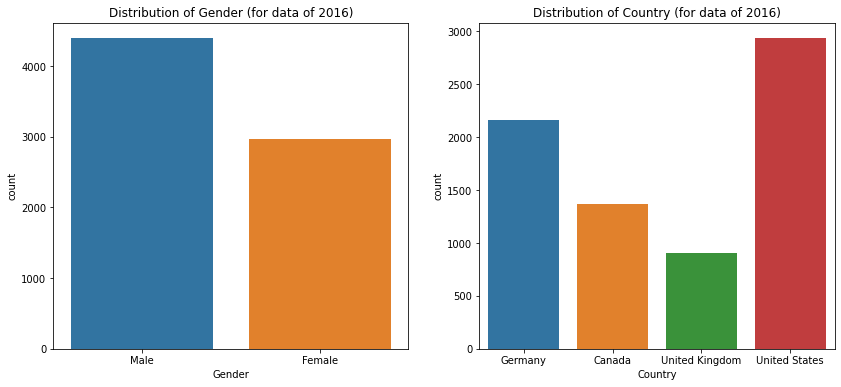

In [89]:
fig = plt.figure(figsize=(14,6))
fig.add_subplot(1,2,1)
sns.countplot(data_2016['Gender'])
plt.title('Distribution of Gender (for data of 2016)')

fig.add_subplot(1,2,2)
sns.countplot(data_2016['Country'])
plt.title('Distribution of Country (for data of 2016)')

Like we see before, the Male transactions is bigger than Female's. The United States and The Germany are still the top two Countries that made huge transactions.

Then, we will divide the data into Male and Female data.

**Splitting into Male and Female data of 2016**

In [90]:
Male_2016 = data_2016[data_2016['Gender'] == 'Male']
Male_2016

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
7601,59197,2016-01-01 04:56:48,Germany,2204,GER1,Male,10.5,43-44,10.0,169,0.0,2016,1,169.0
7602,59198,2016-01-01 06:52:00,Germany,2158,GER3,Male,9.0,42,8.5,149,0.1,2016,1,134.1
7605,59201,2016-01-01 23:25:36,Germany,2154,GER3,Male,9.0,42,8.5,189,0.1,2016,1,170.1
7608,59204,2016-01-02 04:28:00,Canada,2156,CAN6,Male,10.0,43,9.5,159,0.0,2016,1,159.0
7609,59205,2016-01-02 04:42:24,Germany,2210,GER1,Male,11.0,44,10.5,199,0.0,2016,1,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,65769,2016-12-31 04:42:24,Germany,2210,GER2,Male,10.5,43-44,10.0,179,0.5,2016,12,89.5
14960,65771,2016-12-31 07:49:36,United States,2209,US15,Male,9.0,42,8.5,189,0.0,2016,12,189.0
14961,65772,2016-12-31 09:59:12,United States,2168,US13,Male,8.0,41,7.5,129,0.0,2016,12,129.0
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0


In [91]:
Female_2016 = data_2016[data_2016['Gender'] == 'Female']
Female_2016

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
7603,59199,2016-01-01 15:30:24,Germany,2173,GER1,Female,8.5,39,6.5,149,0.2,2016,1,119.2
7604,59200,2016-01-01 15:59:12,Canada,2192,CAN5,Female,7.5,38,5.5,199,0.0,2016,1,199.0
7606,59202,2016-01-02 02:47:12,Germany,2205,GER1,Female,7.5,38,5.5,159,0.0,2016,1,159.0
7607,59203,2016-01-02 04:28:00,United Kingdom,2215,UK5,Female,5.0,35-36,3.0,199,0.1,2016,1,179.1
7610,59206,2016-01-02 04:56:48,United States,2186,US13,Female,8.0,38-39,6.0,189,0.3,2016,1,132.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,65768,2016-12-31 04:42:24,Germany,2205,GER1,Female,7.5,38,5.5,159,0.0,2016,12,159.0
14959,65770,2016-12-31 04:56:48,United States,2178,US13,Female,8.0,38-39,6.0,149,0.2,2016,12,119.2
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


##Exploratory Data of 2016

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Germany')

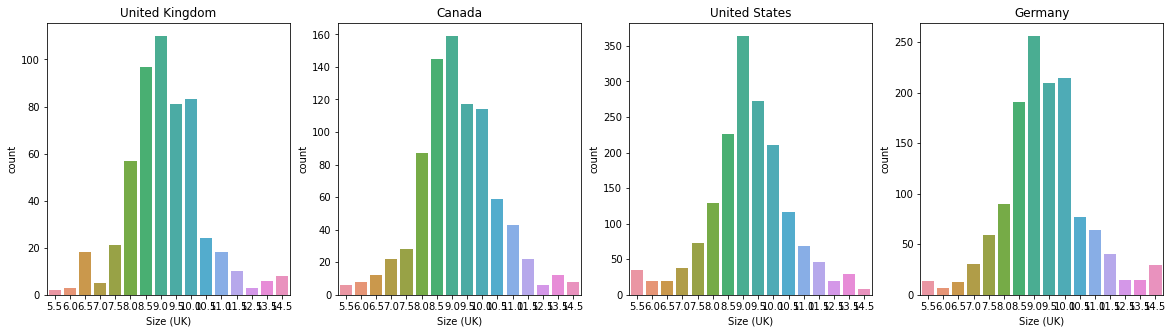

In [92]:
c = Male_2016['Month'].unique()
c = np.array(pd.DataFrame(c).sort_values([0] ,ascending=True))
d = Male_2016['Size (US)'].unique()
d = np.array(pd.DataFrame(d).sort_values([0] ,ascending=True))

Male_Size_UK_2016 = Male_2016[Male_2016['Country'] == 'United Kingdom']['Size (UK)']
Male_Size_Canada_2016 = Male_2016[Male_2016['Country'] == 'Canada']['Size (UK)']
Male_Size_US_2016 = Male_2016[Male_2016['Country'] == 'United States']['Size (UK)']
Male_Size_Germany_2016 = Male_2016[Male_2016['Country'] == 'Germany']['Size (UK)']

#Frequency Distribution Graphs
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
sns.countplot(Male_Size_UK_2016)
plt.title('United Kingdom')

fig.add_subplot(1,4,2)
sns.countplot(Male_Size_Canada_2016)
plt.title('Canada')

fig.add_subplot(1,4,3)
sns.countplot(Male_Size_US_2016)
plt.title('United States')

fig.add_subplot(1,4,4)
sns.countplot(Male_Size_Germany_2016)
plt.title('Germany')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Germany')

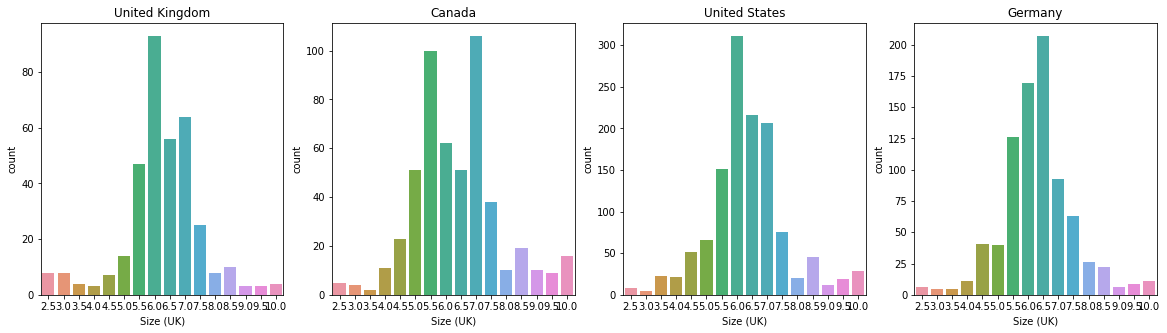

In [93]:
Female_Size_UK_2016 = Female_2016[Female_2016['Country'] == 'United Kingdom']['Size (UK)']
Female_Size_Canada_2016 = Female_2016[Female_2016['Country'] == 'Canada']['Size (UK)']
Female_Size_US_2016 = Female_2016[Female_2016['Country'] == 'United States']['Size (UK)']
Female_Size_Germany_2016 = Female_2016[Female_2016['Country'] == 'Germany']['Size (UK)']

#Frequency Distribution Graphs of 
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,4,1)
sns.countplot(Female_Size_UK_2016)
plt.title('United Kingdom')

fig.add_subplot(1,4,2)
sns.countplot(Female_Size_Canada_2016)
plt.title('Canada')

fig.add_subplot(1,4,3)
sns.countplot(Female_Size_US_2016)
plt.title('United States')

fig.add_subplot(1,4,4)
sns.countplot(Female_Size_Germany_2016)
plt.title('Germany')

From the distribution graphs above, the Male's and Female's still looklike the distribution in '2014-2016' data, their dominant frequencies are in the middle and they have two tails in the lower and upper intervals.

###Frequency Distribution of the Size (US)

Like we used to do, we will see the frequency distribution for Male and Female Size for each country.

In [94]:
tbl_male1_2016 = Male_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Month'], axis = 1)
tbl_male2_2016 = pd.pivot_table(tbl_male1_2016, values='Gender', index=['Size (US)'], columns='Country', aggfunc='count')
print('Male Size Table (data of 2016)')
tbl_male2_2016

Male Size Table (data of 2016)


Country,Canada,Germany,United Kingdom,United States
Size (US),,,,
6.0,6,14,2,35
6.5,8,7,3,20
7.0,12,13,18,20
7.5,22,30,5,38
8.0,28,59,21,73
8.5,87,90,57,129
9.0,145,191,97,226
9.5,159,256,110,364
10.0,117,209,81,273


In [95]:
tbl_female1_2016 = Female.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Month'], axis = 1)
tbl_female2_2016 = pd.pivot_table(tbl_female1_2016, values='Gender', index=['Size (US)'], columns='Country', aggfunc='count')
print('Female Size Table (data of 2016)')
tbl_female2_2016

Female Size Table (data of 2016)


Country,Canada,Germany,United Kingdom,United States
Size (US),,,,
4.5,6,9,15,21
5.0,6,12,9,9
5.5,6,9,6,42
6.0,21,15,12,33
6.5,51,84,24,93
7.0,93,156,27,147
7.5,153,222,87,318
8.0,192,324,168,618
8.5,171,339,129,399


##$Male Monthly 2016$

With the same methode, we will proceed the '2016' to obtain the number of pair for each Size (US). We will do the same thing to Male data for each Country.

###Male_Canada_2016

In [96]:
male_Canada_2016 = Male_2016[Male_2016['Country'] == 'Canada']
tbl_male_Canada_2016 = male_Canada_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_Canada_2016 = pd.pivot_table(tbl_male_Canada_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in Canada -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_Canada_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Canada_2016 = []
for i in arr:
  mean_Canada_2016.append(sum(np.squeeze(tbl_male_Canada_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Canada_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_Canada_2016.loc[[i],m])))/ math.sqrt(n_Canada))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_Canada_2016.loc[[i],m])))/ math.sqrt(n_Canada_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Canada_2016[i] - ME[i])
  CI_max.append(mean_Canada_2016[i] + ME[i])

#Number of Pairs
num_pair_m_Canada_2016 = []
for i in range(0, len(CI_max)):
  num_pair_m_Canada_2016.append(round(CI_max[i], 0))
num_pair_m_Canada_2016

print('Table of Suggestion Number of Pair of Shoes for Canada')
tblmale_Canada_2016 = pd.DataFrame(np.squeeze(np.array(tbl_male_Canada_2016)))
final_Canada_2016 = pd.concat([tblmale_Canada_2016, 
               pd.DataFrame(mean_Canada_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_Canada_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Canada_2016 = final_Canada_2016.set_index('Size (US)')
final_Canada_2016

Male Size Table (Monthly in Canada -2016)
Table of Suggestion Number of Pair of Shoes for Canada


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.3750,0.194625,0.428369,-0.053369,0.803369,1.0
6.5,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.5000,0.309773,0.681811,-0.181811,1.181811,1.0
7.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,0.7500,0.275241,0.605805,0.144195,1.355805,1.0
7.5,2.0,1.0,0.0,0.0,6.0,0.0,4.0,1.0,1.0,4.0,1.0,2.0,1.3750,0.548183,1.206552,0.168448,2.581552,3.0
8.0,3.0,6.0,2.0,4.0,1.0,1.0,6.0,0.0,3.0,1.0,0.0,1.0,1.7500,0.607196,1.336438,0.413562,3.086438,3.0
8.5,7.0,9.0,8.0,8.0,5.0,5.0,1.0,13.0,10.0,12.0,3.0,6.0,5.4375,1.015971,2.236152,3.201348,7.673652,8.0
9.0,10.0,12.0,12.0,15.0,13.0,17.0,13.0,12.0,12.0,15.0,3.0,11.0,9.0625,0.995888,2.191950,6.870550,11.254450,11.0
9.5,4.0,11.0,12.0,21.0,9.0,21.0,20.0,20.0,7.0,9.0,11.0,14.0,9.9375,1.706161,3.755260,6.182240,13.692760,14.0
10.0,7.0,8.0,8.0,14.0,10.0,13.0,8.0,16.0,10.0,11.0,9.0,3.0,7.3125,1.000947,2.203083,5.109417,9.515583,10.0


###Male_Germany_2016

In [97]:
male_Germany_2016 = Male_2016[Male_2016['Country'] == 'Germany']
tbl_male_Germany_2016 = male_Germany_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_Germany_2016 = pd.pivot_table(tbl_male_Germany_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in Germany -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_Germany_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Germany_2016 = []
for i in arr:
  mean_Germany_2016.append(sum(np.squeeze(tbl_male_Germany_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Germany_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_Germany_2016.loc[[i],m])))/ math.sqrt(n_Germany))


#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_Germany_2016.loc[[i],m])))/ math.sqrt(n_Germany_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Germany_2016[i] - ME[i])
  CI_max.append(mean_Germany_2016[i] + ME[i])

#Number of Pairs
num_pair_m_Germany_2016 = []
for i in range(0, len(CI_max)):
  num_pair_m_Germany_2016.append(round(CI_max[i], 0))
num_pair_m_Germany_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for Germany')
tblmale_Germany_2016 = pd.DataFrame(np.squeeze(np.array(tbl_male_Germany_2016)))
final_Germany_2016 = pd.concat([tblmale_Germany_2016, 
               pd.DataFrame(mean_Germany_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_Germany_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Germany_2016 = final_Germany_2016.set_index('Size (US)')
final_Germany_2016

Male Size Table (Monthly in Germany -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for Germany


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,6.0,1.0,1.0,0.8750,0.489795,1.078038,-0.203038,1.953038,2.0
6.5,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.4375,0.228908,0.503827,-0.066327,0.941327,1.0
7.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,3.0,1.0,1.0,0.0,0.8125,0.336162,0.739893,0.072607,1.552393,2.0
7.5,4.0,2.0,0.0,1.0,4.0,5.0,2.0,2.0,4.0,2.0,1.0,3.0,1.8750,0.435194,0.957862,0.917138,2.832862,3.0
8.0,6.0,2.0,4.0,8.0,1.0,5.0,3.0,6.0,6.0,7.0,5.0,6.0,3.6875,0.596179,1.312190,2.375310,4.999690,5.0
8.5,7.0,7.0,7.0,10.0,7.0,8.0,13.0,4.0,9.0,9.0,7.0,2.0,5.6250,0.802458,1.766211,3.858789,7.391211,7.0
9.0,16.0,3.0,9.0,13.0,16.0,23.0,28.0,11.0,35.0,13.0,9.0,15.0,11.9375,2.559765,5.634044,6.303456,17.571544,18.0
9.5,22.0,17.0,11.0,12.0,20.0,29.0,26.0,14.0,22.0,33.0,21.0,29.0,16.0000,2.031320,4.470936,11.529064,20.470936,20.0
10.0,13.0,16.0,13.0,26.0,15.0,21.0,27.0,15.0,16.0,18.0,17.0,12.0,13.0625,1.411309,3.106291,9.956209,16.168791,16.0


###Male_UK_2016

In [98]:
male_UK_2016 = Male_2016[Male_2016['Country'] == 'United Kingdom']
tbl_male_UK_2016 = male_UK_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_UK_2016 = pd.pivot_table(tbl_male_UK_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in United Kingdom -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_UK_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_UK_2016 = []
for i in arr:
  mean_UK_2016.append(sum(np.squeeze(tbl_male_UK_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_UK_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_UK_2016.loc[[i],m])))/ math.sqrt(n_UK))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_UK_2016.loc[[i],m])))/ math.sqrt(n_UK_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_UK_2016[i] - ME[i])
  CI_max.append(mean_UK_2016[i] + ME[i])

#Number of Pairs
num_pair_m_UK_2016 = []
for i in range(0, len(CI_max)):
  num_pair_m_UK_2016.append(round(CI_max[i], 0))
num_pair_m_UK_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for United Kingdom')
tblmale_UK_2016 = pd.DataFrame(np.squeeze(np.array(tbl_male_UK_2016)))
final_UK_2016 = pd.concat([tblmale_UK_2016, 
               pd.DataFrame(mean_UK_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_UK_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_UK_2016 = final_UK_2016.set_index('Size (US)')
final_UK_2016

Male Size Table (Monthly in United Kingdom -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for United Kingdom


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1250,0.166667,0.366833,-0.241833,0.491833,0.0
6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.1875,0.179435,0.394937,-0.207437,0.582437,1.0
7.0,2.0,0.0,2.0,0.0,0.0,4.0,4.0,0.0,2.0,2.0,2.0,0.0,1.1250,0.435194,0.957862,0.167138,2.082862,2.0
7.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.3125,0.336162,0.739893,-0.427393,1.052393,1.0
8.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,0.0,1.0,3.0,1.0,3.0,1.3125,0.462618,1.018222,0.294278,2.330722,2.0
8.5,4.0,3.0,9.0,6.0,3.0,2.0,10.0,9.0,1.0,4.0,2.0,4.0,3.5625,0.880126,1.937157,1.625343,5.499657,5.0
9.0,15.0,1.0,9.0,10.0,2.0,17.0,6.0,4.0,16.0,7.0,7.0,3.0,6.0625,1.583333,3.484917,2.577583,9.547417,10.0
9.5,8.0,7.0,11.0,19.0,8.0,10.0,6.0,10.0,10.0,10.0,4.0,7.0,6.8750,1.071909,2.359273,4.515727,9.234273,9.0
10.0,8.0,4.0,5.0,3.0,8.0,7.0,9.0,15.0,7.0,3.0,9.0,3.0,5.0625,1.008487,2.219679,2.842821,7.282179,7.0


###Male_US_2016

In [99]:
male_US_2016 = Male_2016[Male_2016['Country'] == 'United States']
tbl_male_US_2016 = male_US_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_male_US_2016 = pd.pivot_table(tbl_male_US_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Male Size Table (Monthly in United States -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = male_US_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_US_2016 = []
for i in arr:
  mean_US_2016.append(sum(np.squeeze(tbl_male_US_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_US_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_male_US_2016.loc[[i],m])))/ math.sqrt(n_US))


#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_male_US_2016.loc[[i],m])))/ math.sqrt(n_US_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_US_2016[i] - ME[i])
  CI_max.append(mean_US_2016[i] + ME[i])

#Number of Pairs
num_pair_m_US_2016 = []
for i in range(0, len(CI_max)):
  num_pair_m_US_2016.append(round(CI_max[i], 0))
num_pair_m_US_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for United States')
tblmale_US_2016 = pd.DataFrame(np.squeeze(np.array(tbl_male_US_2016)))
final_US_2016 = pd.concat([tblmale_US_2016, 
               pd.DataFrame(mean_US_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_m_US_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_US_2016 = final_US_2016.set_index('Size (US)')
final_US_2016

Male Size Table (Monthly in United States -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for United States


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,4.0,1.0,3.0,1.0,3.0,3.0,3.0,4.0,3.0,7.0,3.0,0.0,2.1875,0.514315,1.132008,1.055492,3.319508,3.0
6.5,3.0,2.0,0.0,1.0,0.0,0.0,1.0,7.0,2.0,1.0,2.0,1.0,1.2500,0.555050,1.221666,0.028334,2.471666,2.0
7.0,0.0,0.0,1.0,0.0,6.0,4.0,4.0,2.0,3.0,0.0,0.0,0.0,1.2500,0.607196,1.336438,-0.086438,2.586438,3.0
7.5,3.0,2.0,3.0,1.0,7.0,0.0,7.0,3.0,4.0,6.0,1.0,1.0,2.3750,0.694495,1.528583,0.846417,3.903583,4.0
8.0,7.0,9.0,7.0,3.0,12.0,2.0,9.0,4.0,7.0,5.0,2.0,6.0,4.5625,0.882990,1.943461,2.619039,6.505961,7.0
8.5,12.0,12.0,8.0,8.0,15.0,9.0,17.0,17.0,6.0,9.0,10.0,6.0,8.0625,1.122261,2.470096,5.592404,10.532596,11.0
9.0,17.0,13.0,13.0,11.0,21.0,22.0,25.0,30.0,26.0,25.0,13.0,10.0,14.1250,1.968823,4.333379,9.791621,18.458379,18.0
9.5,19.0,25.0,27.0,24.0,26.0,33.0,25.0,47.0,31.0,44.0,37.0,26.0,22.7500,2.447427,5.386787,17.363213,28.136787,28.0
10.0,17.0,26.0,26.0,19.0,16.0,31.0,25.0,24.0,23.0,31.0,15.0,20.0,17.0625,1.567303,3.449634,13.612866,20.512134,21.0


##$Female Monthly 2016$

We do the same thing as well to the female data.

###Female_Canada_2016

In [100]:
female_Canada_2016 = Female_2016[Female_2016['Country'] == 'Canada']
tbl_female_Canada_2016 = female_Canada_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_Canada_2016 = pd.pivot_table(tbl_female_Canada_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in United States -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_Canada_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Canada_2016 = []
for i in arr:
  mean_Canada_2016.append(sum(np.squeeze(tbl_female_Canada_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Canada_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_Canada_2016.loc[[i],m])))/ math.sqrt(n_Canada_2016))


#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_Canada_2016.loc[[i],m])))/ math.sqrt(n_Canada_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Canada_2016[i] - ME[i])
  CI_max.append(mean_Canada_2016[i] + ME[i])

#Number of Pairs
num_pair_f_Canada_2016 = []
for i in range(0, len(CI_max)):
  num_pair_f_Canada_2016.append(round(CI_max[i], 0))
num_pair_f_Canada_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for Canada')
tblfemale_Canada_2016 = pd.DataFrame(np.squeeze(np.array(tbl_female_Canada_2016)))
final_Canada_2016 = pd.concat([tblfemale_Canada_2016, 
               pd.DataFrame(mean_Canada_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_Canada_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Canada_2016 = final_Canada_2016.set_index('Size (US)')
final_Canada_2016

Female Size Table (Monthly in United States -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for Canada


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3125,0.416667,0.917083,-0.604583,1.229583,1.0
5.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.224733,0.494638,-0.244638,0.744638,1.0
5.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1250,0.112367,0.247319,-0.122319,0.372319,0.0
6.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.6875,0.336162,0.739893,-0.052393,1.427393,1.0
6.5,0.0,0.0,3.0,3.0,1.0,5.0,4.0,3.0,1.0,0.0,0.0,3.0,1.4375,0.514315,1.132008,0.305492,2.569508,3.0
7.0,4.0,5.0,2.0,1.0,1.0,4.0,1.0,5.0,13.0,7.0,7.0,1.0,3.1875,1.030776,2.268739,0.918761,5.456239,5.0
7.5,19.0,12.0,7.0,13.0,8.0,7.0,1.0,7.0,8.0,7.0,4.0,7.0,6.2500,1.321921,2.909548,3.340452,9.159548,9.0
8.0,3.0,2.0,6.0,5.0,4.0,4.0,5.0,9.0,5.0,5.0,9.0,5.0,3.8750,0.600925,1.322636,2.552364,5.197636,5.0
8.5,2.0,5.0,4.0,4.0,3.0,5.0,3.0,6.0,7.0,1.0,4.0,7.0,3.1875,0.538305,1.184810,2.002690,4.372310,4.0


###Female_Germany_2016

In [101]:
female_Germany_2016 = Female_2016[Female_2016['Country'] == 'Germany']
tbl_female_Germany_2016 = female_Germany_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_Germany_2016 = pd.pivot_table(tbl_female_Germany_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in Germany -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_Germany_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_Germany_2016 = []
for i in arr:
  mean_Germany_2016.append(sum(np.squeeze(tbl_female_Germany_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_Germany_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_Germany_2016.loc[[i],m])))/ math.sqrt(n_Germany_2016))


#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_Germany_2016.loc[[i],m])))/ math.sqrt(n_Germany_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_Germany_2016[i] - ME[i])
  CI_max.append(mean_Germany_2016[i] + ME[i])

#Number of Pairs
num_pair_f_Germany_2016 = []
for i in range(0, len(CI_max)):
  num_pair_f_Germany_2016.append(round(CI_max[i], 0))
num_pair_f_Germany_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for Germany')
tblfemale_Germany_2016 = pd.DataFrame(np.squeeze(np.array(tbl_female_Germany_2016)))
final_Germany_2016 = pd.concat([tblfemale_Germany_2016, 
               pd.DataFrame(mean_Germany_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_Germany_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_Germany_2016 = final_Germany_2016.set_index('Size (US)')
final_Germany_2016

Female Size Table (Monthly in Germany -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for Germany


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.3750,0.261116,0.574717,-0.199717,0.949717,1.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.3125,0.287580,0.632963,-0.320463,0.945463,1.0
5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.3125,0.192996,0.424784,-0.112284,0.737284,1.0
6.0,0.0,5.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6875,0.468045,1.030166,-0.342666,1.717666,2.0
6.5,5.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,6.0,2.0,8.0,4.0,2.5625,0.583333,1.283917,1.278583,3.846417,4.0
7.0,0.0,4.0,3.0,8.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,7.0,2.5000,0.655204,1.442105,1.057895,3.942105,4.0
7.5,4.0,3.0,5.0,4.0,6.0,17.0,15.0,12.0,23.0,24.0,8.0,5.0,7.8750,2.186390,4.812245,3.062755,12.687245,13.0
8.0,22.0,17.0,8.0,22.0,9.0,6.0,17.0,14.0,10.0,21.0,11.0,12.0,10.5625,1.625825,3.578442,6.984058,14.140942,14.0
8.5,20.0,18.0,22.0,12.0,20.0,11.0,25.0,18.0,11.0,16.0,17.0,17.0,12.9375,1.250000,2.751250,10.186250,15.688750,16.0


###Female_UK_2016

In [102]:
female_UK_2016 = Female_2016[Female_2016['Country'] == 'United Kingdom']
tbl_female_UK_2016 = female_UK_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_UK_2016 = pd.pivot_table(tbl_female_UK_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in United Kingdom -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_UK_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_UK_2016 = []
for i in arr:
  mean_UK_2016.append(sum(np.squeeze(tbl_female_UK_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_UK_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_UK_2016.loc[[i],m])))/ math.sqrt(n_UK_2016))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_UK_2016.loc[[i],m])))/ math.sqrt(n_UK_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_UK_2016[i] - ME[i])
  CI_max.append(mean_UK_2016[i] + ME[i])

#Number of Pairs
num_pair_f_UK_2016 = []
for i in range(0, len(CI_max)):
  num_pair_f_UK_2016.append(round(CI_max[i], 0))
num_pair_f_UK_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for United Kingom')
tblfemale_UK_2016 = pd.DataFrame(np.squeeze(np.array(tbl_female_UK_2016)))
final_UK_2016 = pd.concat([tblfemale_UK_2016, 
               pd.DataFrame(mean_UK_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_UK_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_UK_2016 = final_UK_2016.set_index('Size (US)')
final_UK_2016

Female Size Table (Monthly in United Kingdom -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for United Kingom


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.5000,0.355335,0.782091,-0.282091,1.282091,1.0
5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.5000,0.432283,0.951455,-0.451455,1.451455,1.0
5.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.2500,0.188025,0.413844,-0.163844,0.663844,1.0
6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.179435,0.394937,-0.207437,0.582437,1.0
6.5,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4375,0.336162,0.739893,-0.302393,1.177393,1.0
7.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.8750,0.600925,1.322636,-0.447636,2.197636,2.0
7.5,5.0,6.0,6.0,6.0,2.0,1.0,2.0,0.0,7.0,1.0,6.0,5.0,2.9375,0.722562,1.590359,1.347141,4.527859,5.0
8.0,4.0,4.0,12.0,11.0,10.0,7.0,6.0,10.0,8.0,7.0,9.0,5.0,5.8125,0.779714,1.716151,4.096349,7.528651,8.0
8.5,5.0,3.0,7.0,0.0,2.0,1.0,6.0,8.0,6.0,6.0,10.0,2.0,3.5000,0.881917,1.941100,1.558900,5.441100,5.0


###Female_US_2016

In [103]:
female_US_2016 = Female_2016[Female_2016['Country'] == 'United States']
tbl_female_US_2016 = female_US_2016.drop(columns=['Date', 'InvoiceNo', 'ProductID', 'Shop', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'SalePrice', 'Year', 'Country'], axis = 1)
tbl_female_US_2016 = pd.pivot_table(tbl_female_US_2016, values='Gender', index=['Size (US)'], columns='Month', aggfunc='count').fillna(0)
print('Female Size Table (Monthly in United States -2016)')

m = [1,2,3,4,5,6,7,8,9,10,11,12]

arr = female_US_2016['Size (US)'].unique()
temp = 0
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    

#Mean
mean_US_2016 = []
for i in arr:
  mean_US_2016.append(sum(np.squeeze(tbl_female_US_2016.loc[[i],m]))/len(arr))

#Standard Error
staderr = []
n_US_2016 = 12 #12 months
for i in arr:
  staderr.append((stat.stdev(np.squeeze(tbl_female_US_2016.loc[[i],m])))/ math.sqrt(n_US_2016))

#Margin of Error
ME = [] 
for i in arr:
  ME.append(((stat.stdev(np.squeeze(tbl_female_US_2016.loc[[i],m])))/ math.sqrt(n_US_2016))*t11_0025)

#Confidence Interval (CI)
#95% CI, \alpha = 1 - 95% = 0.05
CI_min = []
CI_max = []
for i in range(0,len(ME)):
  CI_min.append(mean_US_2016[i] - ME[i])
  CI_max.append(mean_US_2016[i] + ME[i])

#Number of Pairs
num_pair_f_US_2016 = []
for i in range(0, len(CI_max)):
  num_pair_f_US_2016.append(round(CI_max[i], 0))
num_pair_f_US_2016

print('Confindence Interval (CI), Confidence = 95%')
display(Math(r'CI = [\mu + ME, \mu - ME]'))
display(Math(r'ME = t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'ME = t_{11,0.025} \times \sqrt{\frac{\sigma^2}{n}}'))
display(Math(r'CI = [\mu - t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}, \mu + t_{n-1,\frac{\alpha}{2}} \times \sqrt{\frac{\sigma^2}{n}}]'))

print('Table of Suggestion Number of Pair of Shoes for United States')
tblfemale_US_2016 = pd.DataFrame(np.squeeze(np.array(tbl_female_US_2016)))
final_US_2016 = pd.concat([tblfemale_US_2016, 
               pd.DataFrame(mean_US_2016), 
               pd.DataFrame(staderr),
               pd.DataFrame(ME),
               pd.DataFrame(CI_min),
               pd.DataFrame(CI_max),
               pd.DataFrame(num_pair_f_US_2016),
               pd.DataFrame(arr)], axis=1).set_axis(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                                     'Aug','Sep','Okt','Nov','Des','Mean',
                                                     'Standard Error','Margin of Error' ,'CI Lower Limit', 
                                                     'CI Upper Limit','Number of Pairs','Size (US)'], axis=1)
final_US_2016 = final_US_2016.set_index('Size (US)')
final_US_2016

Female Size Table (Monthly in United States -2016)
Confindence Interval (CI), Confidence = 95%


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Table of Suggestion Number of Pair of Shoes for United States


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Mean,Standard Error,Margin of Error,CI Lower Limit,CI Upper Limit,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
4.5,0.0,1.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5000,0.284268,0.625673,-0.125673,1.125673,1.0
5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.2500,0.142134,0.312837,-0.062837,0.562837,1.0
5.5,5.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,0.0,3.0,6.0,1.4375,0.633154,1.393572,0.043928,2.831072,3.0
6.0,0.0,3.0,3.0,9.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.3125,0.739830,1.628366,-0.315866,2.940866,3.0
6.5,10.0,6.0,8.0,0.0,2.0,9.0,12.0,2.0,0.0,2.0,1.0,0.0,3.2500,1.269296,2.793719,0.456281,6.043719,6.0
7.0,6.0,3.0,3.0,5.0,5.0,12.0,5.0,6.0,5.0,8.0,4.0,4.0,4.1250,0.712444,1.568088,2.556912,5.693088,6.0
7.5,3.0,14.0,7.0,24.0,12.0,19.0,13.0,10.0,18.0,18.0,9.0,4.0,9.4375,1.844149,4.058971,5.378529,13.496471,13.0
8.0,19.0,34.0,17.0,20.0,34.0,19.0,31.0,38.0,29.0,33.0,23.0,14.0,19.4375,2.340223,5.150830,14.286670,24.588330,25.0
8.5,7.0,5.0,12.0,12.0,27.0,25.0,35.0,17.0,27.0,22.0,12.0,15.0,13.5000,2.645751,5.823299,7.676701,19.323299,19.0


#**CONCLUSION**

Like what I said in the beginning, we will see the comparison between '2014-2016' data and '2016' data here.

##Male 2014-2016

After we got all number of pair for each Country, this is the conclusion that we obtain the prediction of total production (Male) for the next 3 years for each Size (US). In this case, the data is for total of productions of 2017 until 2019.

In [104]:
OA_Male_1416 = pd.concat([pd.DataFrame(num_pair_m_Canada), 
           pd.DataFrame(num_pair_m_Germany),
           pd.DataFrame(num_pair_m_UK), 
           pd.DataFrame(num_pair_m_US),
          pd.DataFrame(arr)]
          , axis = 1).set_axis(['Canada (Pcs)', 'Germany (Pcs)', 
                                'United Kingdom (Pcs)', 'United States (Pcs)', 'Size (US)'], axis = 1)
print('Number of Pair Distribution (Male) for Next 3 Years (2017 - 2019)')
OA_Male_1416 = OA_Male_1416.set_index('Size (US)')
OA_Male_1416

Number of Pair Distribution (Male) for Next 3 Years (2017 - 2019)


,Canada (Pcs),Germany (Pcs),United Kingdom (Pcs),United States (Pcs)
Size (US),,,,
4.5,2.0,4.0,1.0,5.0
5.0,2.0,2.0,2.0,5.0
5.5,3.0,3.0,2.0,4.0
6.0,5.0,5.0,2.0,6.0
6.5,6.0,9.0,5.0,12.0
7.0,17.0,14.0,7.0,17.0
7.5,26.0,30.0,16.0,37.0
8.0,30.0,43.0,18.0,53.0
8.5,17.0,30.0,13.0,41.0


By using data of 2016, this is the conclusion that we obtain the prediction of production (Male) for the next year for each Size (US). In this case this is for 2017 production.

In [105]:
OA_Male_2016 = pd.concat([pd.DataFrame(num_pair_m_Canada_2016), 
           pd.DataFrame(num_pair_m_Germany_2016),
           pd.DataFrame(num_pair_m_UK_2016), 
           pd.DataFrame(num_pair_m_US_2016), 
          pd.DataFrame(arr)]
          , axis = 1).set_axis(['Canada (Pcs)', 'Germany (Pcs)',  
                                'United Kingdom (Pcs)', 'United States (Pcs)', 'Size (US)'], axis = 1)
print('Number of Pair Distribution (Male) for Next Year (2017)')
OA_Male_2016 = OA_Male_2016.set_index('Size (US)')
OA_Male_2016

Number of Pair Distribution (Male) for Next Year (2017)


,Canada (Pcs),Germany (Pcs),United Kingdom (Pcs),United States (Pcs)
Size (US),,,,
4.5,1.0,2.0,0.0,3.0
5.0,1.0,1.0,1.0,2.0
5.5,1.0,2.0,2.0,3.0
6.0,3.0,3.0,1.0,4.0
6.5,3.0,5.0,2.0,7.0
7.0,8.0,7.0,5.0,11.0
7.5,11.0,18.0,10.0,18.0
8.0,14.0,20.0,9.0,28.0
8.5,10.0,16.0,7.0,21.0


##Female 2014-2016 vs 2016

We got all number of pair for each Country for female, this is the conclusion that we obtain the prediction of total production (Female) for the next 3 years for each Size (US) as well, for 2017 - 2019.

In [106]:
OA_Female_1416 = pd.concat([pd.DataFrame(num_pair_f_Canada), 
           pd.DataFrame(num_pair_f_Germany),
           pd.DataFrame(num_pair_f_UK), 
           pd.DataFrame(num_pair_f_US),
          pd.DataFrame(arr)]
          , axis = 1).set_axis(['Canada (Pcs)', 'Germany (Pcs)', 
                                'United Kingdom (Pcs)', 'United States (Pcs)', 'Size (US)'], axis = 1)
print('Number of Pair Distribution (Female) for Next 3 Years (2017 - 2019)')
OA_Female_1416 = OA_Female_1416.set_index('Size (US)')
OA_Female_1416

Number of Pair Distribution (Female) for Next 3 Years (2017 - 2019)


,Canada (Pcs),Germany (Pcs),United Kingdom (Pcs),United States (Pcs)
Size (US),,,,
4.5,1.0,2.0,2.0,3.0
5.0,1.0,2.0,2.0,1.0
5.5,1.0,1.0,1.0,5.0
6.0,3.0,2.0,2.0,4.0
6.5,6.0,8.0,7.0,11.0
7.0,10.0,13.0,12.0,12.0
7.5,13.0,20.0,16.0,25.0
8.0,14.0,27.0,23.0,45.0
8.5,15.0,24.0,24.0,35.0


By using data of 2016 from Female, this is the conclusion that we obtain the prediction of production (Female) for the next year for each Size (US). In this case this is for 2017 production as well.

In [107]:
OA_Female_2016 = pd.concat([pd.DataFrame(num_pair_f_Canada_2016), 
           pd.DataFrame(num_pair_f_Germany_2016),
           pd.DataFrame(num_pair_f_UK_2016), 
           pd.DataFrame(num_pair_f_US_2016), 
          pd.DataFrame(arr)]
          , axis = 1).set_axis(['Canada (Pcs)', 'Germany (Pcs)',  
                                'United Kingdom (Pcs)', 'United States (Pcs)', 'Size (US)'], axis = 1)
print('Number of Pair Distribution (Female) for Next Year (2017)')
OA_Female_2016 = OA_Female_2016.set_index('Size (US)')
OA_Female_2016

Number of Pair Distribution (Female) for Next Year (2017)


,Canada (Pcs),Germany (Pcs),United Kingdom (Pcs),United States (Pcs)
Size (US),,,,
4.5,1.0,1.0,1.0,1.0
5.0,1.0,1.0,1.0,1.0
5.5,0.0,1.0,1.0,3.0
6.0,1.0,2.0,1.0,3.0
6.5,3.0,4.0,1.0,6.0
7.0,5.0,4.0,2.0,6.0
7.5,9.0,13.0,5.0,13.0
8.0,5.0,14.0,8.0,25.0
8.5,4.0,16.0,5.0,19.0


#Converting Data That Will Be Presented

With the concern that the company needs 'the production suggestion data' for the next year, so the data that will be presented are the data of:
1. Number of Pair Distribution (Male) for Next Year (2017), and
2. Number of Pair Distribution (Female) for Next Year (2017)

In [108]:
Male_Output = pd.ExcelWriter('Male_Shoes_for_2017_Production.xlsx')
Female_Output = pd.ExcelWriter('Female_Shoes_for_2017_Production.xlsx')
OA_Male_2016.to_excel(Male_Output)
OA_Female_2016.to_excel(Female_Output)

Male_Output.save()
Female_Output.save()